In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import darts as darts

In [2]:
#load csv file
df = pd.read_csv('test_nn.csv', sep=';')

#show first 5 rows
df.head()

,Time,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18
0,05_12_2022_09_05_31,93.624000,64.262000,64.138000,74.27533333333334,0.0,0.000000,35.68666666666667,0.004667,49.976,0.091333,0.0,0.0,0.000000,0.000000,76.794000,99.733333,99.733333,99.733333
1,05_12_2022_09_21_59,89.998667,65.000000,64.523333,71.158,0.03933333333333333,20.972000,38.0,0.000000,46.0,0.004667,12.974,0.03933333333333333,0.046667,0.205333,76.144667,99.666667,99.600000,99.600000
2,05_12_2022_09_27_23,89.638000,64.776000,64.783333,70.81066666666666,0.0,20.958000,37.924,0.000000,45.89666666666667,0.000000,12.934666666666667,0.0,0.000000,0.000000,75.714667,99.600000,99.733333,99.612667
3,05_12_2022_09_32_47,89.938000,64.961333,65.000000,71.0,0.0,20.999333,38.0,0.000000,45.92066666666667,0.000000,12.822,0.0,0.000000,0.000000,76.000000,100.000000,100.000000,100.000000
4,05_12_2022_09_38_11,89.138667,64.391333,64.263333,71.41066666666667,0.059333333333333335,20.947333,37.898666666666664,0.022667,43.67333333333333,0.000000,12.708,0.032,0.020667,0.718667,75.825333,99.885333,99.800000,98.348667


In [3]:
#load new variable with only the first and second column
column1 = df.iloc[:,0]
number_fill = 5
column2 = df.iloc[:,number_fill]

df2 = pd.DataFrame({'Time': column1, 'F'+str(number_fill): column2})

#show first 5 rows
df2.head()

,Time,F5
0,05_12_2022_09_05_31,0.0
1,05_12_2022_09_21_59,0.03933333333333333
2,05_12_2022_09_27_23,0.0
3,05_12_2022_09_32_47,0.0
4,05_12_2022_09_38_11,0.059333333333333335


In [4]:
"""
Example:
05_12_2022_09_05_31;93.624000
05_12_2022_09_21_59;89.998667
05_12_2022_09_27_23;89.638000
05_12_2022_09_32_47;89.938000
05_12_2022_09_38_11;89.138667
"""

# Get name of the second column
col2name = df2.columns[1]

# Convert the second column to a float type and set it as the time series values
values = df[col2name].astype(float).values

# Create a TimeSeries object from the values, using the Time column as the time index (first column)
time_index = darts.TimeSeries.from_times_and_values(df2.index, values)

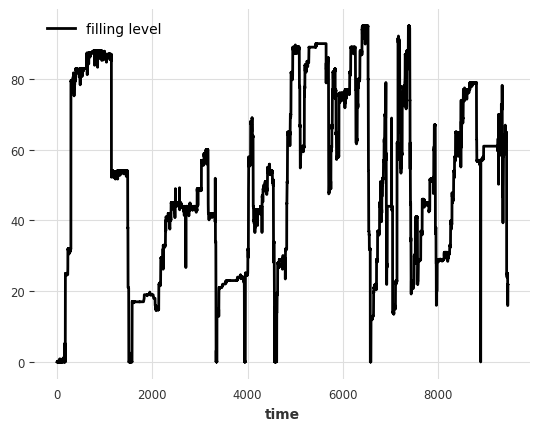

In [5]:
# Save as a TimeSeries object
series = darts.TimeSeries.from_times_and_values(df2.index, values)

series.plot(label='filling level')
plt.legend()

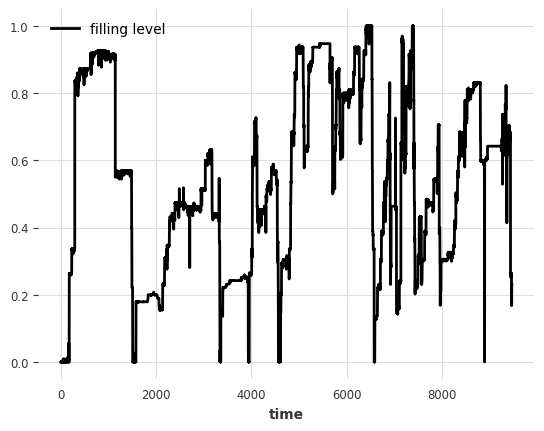

In [6]:
from darts.dataprocessing.transformers import Scaler

# Create a Scaler object
scaler = Scaler()

# Fit the scaler on the series
series_scaled = scaler.fit_transform(series)

series_scaled.plot(label='filling level')
plt.legend()

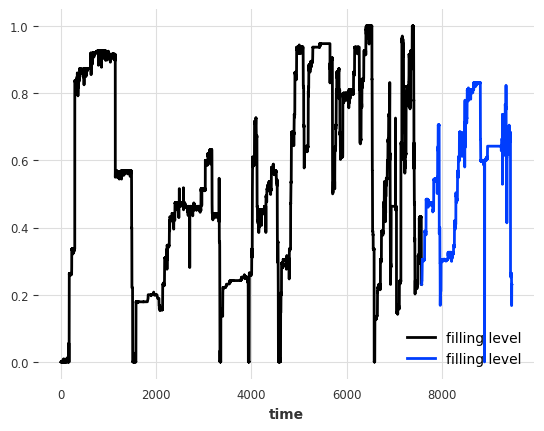

In [7]:
# Train and Validation split
train, val = series_scaled.split_before(0.80)

# Plot the training and validation series
train.plot(label='filling level')
val.plot(label='filling level')

In [8]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [9]:
model = NBEATSModel(
    input_chunk_length=1032, 
    output_chunk_length=516, 
    n_epochs=5000, #100
    random_state=0,
    pl_trainer_kwargs={
        "accelerator": "gpu",
        "devices": [0]
    }
    )

In [10]:
model.fit(train, verbose=True)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 14.2 M
---------------------------------------------------
14.2 M    Trainable params
7.5 K     Non-trainable params
14.2 M    Total params
113.684   Total estimat

Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=5000` reached.


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 3080 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 0it [00:00, ?it/s]

MAPE = 62.37%
SMAPE = 40.42%


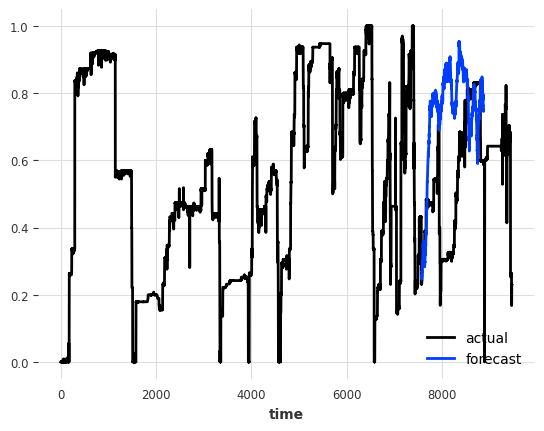

In [12]:
pred = model.predict(n=1300, series=train)

series_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend()
#MAPE
print('MAPE = {:.2f}%'.format(mape(series_scaled, pred)))
#OTHER METRICS
print('SMAPE = {:.2f}%'.format(smape(series_scaled, pred)))